<a href="https://colab.research.google.com/github/samiulhaq45/Student_marks_forcasting/blob/main/Students_grade_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Attributes Information:**

1. **`school`** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).

2. **`sex`** - student's sex (binary: 'F' - female or 'M' - male).

3. **`age`** - student's age (numeric: from 15 to 22).

4. **`address`** - student's home address type (binary: 'U' - urban or 'R' - rural).

5. **`famsize`** - family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3).

6. **`Pstatus`**- parent's cohabitation status (binary: 'T' - living together or 'A' - apart).

7. **`Medu`** - mother's education (numeric: **0** - none, **1** - primary education (4th grade), **2** - 5th to 9th grade, **3** - secondary education or **4** - higher education).

8. **`Fedu`** - father's education (numeric: **0** - none, **1** - primary education (4th grade), **2** - 5th to 9th grade, **3** - secondary education or **4** - higher education).

9. **`Mjob`** - mother's job (nominal: '*teacher*', '*health*' care related, civil '*services*' (e.g. administrative or police), '*at_home*' or '*other*').

10. **`Fjob`**- father's job (nominal: '*teacher*', '*health*' care related, civil '*services*' (e.g. administrative or police), '*at_home*' or '*other*').

11. **`reason`** - reason to choose this school (nominal: close to '*home*', school '*reputation*', '*course*' preference or '*other*').

12. **`guardian`** - student's guardian (nominal: 'mother', 'father' or 'other').

13. **`traveltime`** - home to school travel time (numeric: **1** - <15 min., **2** - 15 to 30 min., **3** - 30 min. to 1 hour, or **4** - >1 hour).

14. **`studytime`** - weekly study time (numeric: **1** - <2 hours, **2** - 2 to 5 hours, **3** - 5 to 10 hours, or **4** - >10 hours).

15. **`failures`** - number of past class failures (numeric: n if **0 <= n < 3**, else **3**).

16. **`schoolsup`** - extra educational support (binary: yes or no).

17. **`famsup`** - family educational support (binary: yes or no).

18. **`paid`** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no).

19. **`activities`** - extra-curricular activities (binary: yes or no).

20. **`nursery`** - attended nursery school (binary: yes or no).

21. **`higher`** - wants to take higher education (binary: yes or no).

22. **`internet`** - Internet access at home (binary: yes or no).

23. **`romantic`** - with a romantic relationship (binary: yes or no).

24. **`famrel`** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent).

25. **`freetime`** - free time after school (numeric: from **1** - very low to **5** - very high).

26. **`goout`** - going out with friends (numeric: from **1** - very low to **5** - very high).

27. **`Dalc`** - workday alcohol consumption (numeric: from **1** - very low to **5** - very high).

28. **`Walc`** - weekend alcohol consumption (numeric: from **1** - very low to **5** - very high).

29. **`health`** - current health status (numeric: from **1** - very bad to **5** - very good).

30. **`absences`** - number of school absences (numeric: from **0** to **93**).

##  **Grades which are related with the course subject:**

31. **`G1`** - first period grade (numeric: from **0** to **20**).
32. **`G2`** - second period grade (numeric: from **0** to **20**)
33. **`G3`** - final grade (numeric: from **0** to **20**, `Output Target`)


## **Important Imports**


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import pickle
import pydotplus

from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    LogisticRegression,
    SGDClassifier,
    BayesianRidge,
)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from six import StringIO
from IPython.display import Image
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.svm import LinearSVC
from numpy.ma.core import sqrt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from numpy.polynomial.polynomial import polyfit
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    confusion_matrix
)
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## **Loading Data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Semester Project/student-mat.csv")

#### Displaying the number of columns and the size of the data

In [ ]:
df.shape

(395, 33)

**Note**: We have 395 rows with 33 columns.

#### Displaying the first 5 rows

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Displaying the last 5 rows

In [ ]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


#### Displaying the datatypes of each attributes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### Displaying the categorical attributes.

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
print(len(categorical_columns))

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
17


#### Displaying the numerical attributes.

In [ ]:
numerical_columns = df.select_dtypes(include=['int64']).columns.tolist()
print(numerical_columns)
print(len(numerical_columns))

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
16


#### Displaying some statistics about the numerical data.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


#### Displaying some statistics about categorical data.

In [ ]:
df.describe(include='object')


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


## **Data Peprocessing**

### **Clean data**

* **Drop rows that have G3 less than 1**.

Filter out records with negative or zero values for 'G3'.

In [ ]:
df.drop(df[df['G3'] < 1].index, inplace = True)

### **Encoding categorical data**


#### **One hot Encoding**

The dataset contains nominal categorical data, making one-hot encoding the most suitable technique for data representation.

In [ ]:
df_ohe = pd.get_dummies(df, drop_first=True)

### **Feature selection**

Find the correlation between "G3" and all other columns in the one-hot encoded DataFrame.

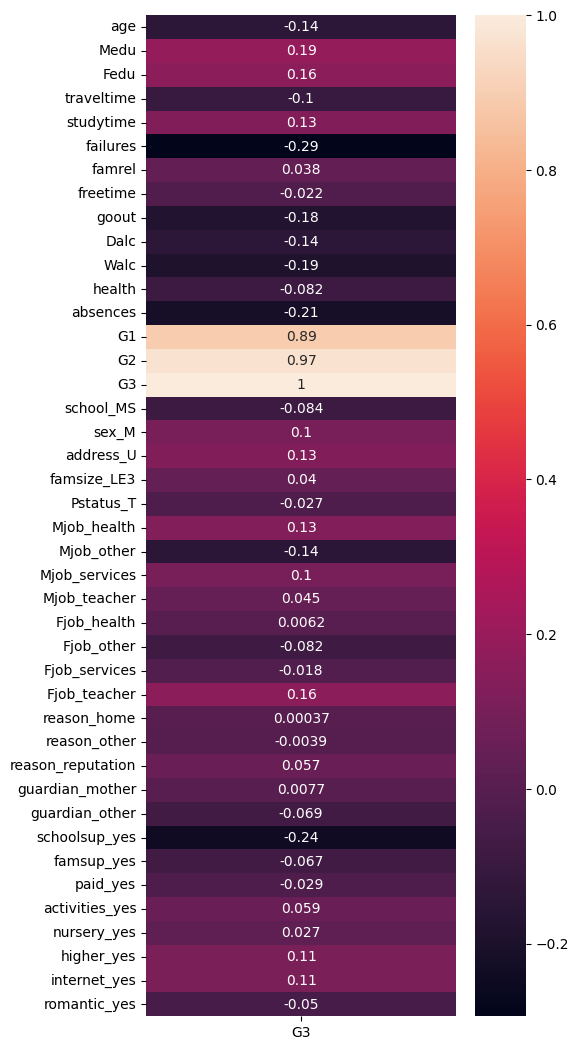

In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_ohe.corr()

# Extract the correlation values for the 'G3' column
correlation_with_G3 = correlation_matrix['G3']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_G3.to_frame(), annot=True, cbar=True)
plt.show()

**Note**: We can observe that certain features underwent changes in correlation following the encoding process.

**Note**: Filtering out features that have a low linear correlation (less than 0.13) with the "G3" column. because Removing low-correlation features can help improve the efficiency and effectiveness of machine learning models by reducing noise in the data and potentially speeding up training.

In [ ]:
THRESHOLD = 0.13

In [ ]:
G3_corr = df_ohe.corr()["G3"]

In [ ]:
df_ohe_after_drop_features = df_ohe.copy()

In [ ]:
for key, value in G3_corr.iteritems():
  if abs(value) < THRESHOLD:
    df_ohe_after_drop_features.drop(columns= key, inplace=True)

* **Note**: We are excluding the "age" feature due to its inconsistent data.

In [ ]:
df_ohe_after_drop_features.drop(columns=["age"], axis=1, inplace=True)

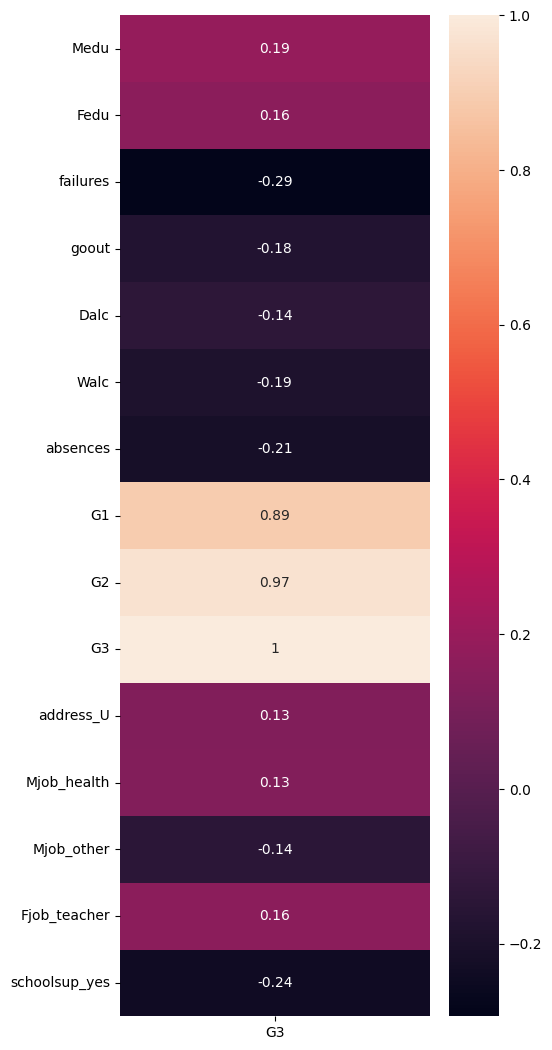

In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = df_ohe_after_drop_features.corr()

# Extract the correlation values for the 'G3' column
correlation_with_G3 = correlation_matrix['G3']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(correlation_with_G3.to_frame(), annot=True, cbar=True)
plt.show()

* Splitting the dataset into input features (X) and the target variable (y).
Specifically, separates the DataFrame `df_ohe_after_drop_features` into two parts:

  * `X`: Contains the input features used for training a machine learning model. It includes all columns except the 'G3' column.

  * `y`: Represents the target variable, which is the 'G3' column. This column holds the values you want to predict or model.

In [ ]:
X = df_ohe_after_drop_features.drop('G3',axis = 1)
y = df_ohe_after_drop_features['G3']

* Displaying the first five rows after the featue selection.

In [ ]:
df_ohe_after_drop_features.head()

,Medu,Fedu,failures,goout,Dalc,Walc,absences,G1,G2,G3,address_U,Mjob_health,Mjob_other,Fjob_teacher,schoolsup_yes
0,4,4,0,4,1,1,6,5,6,6,1,0,0,1,1
1,1,1,0,3,1,1,4,5,5,6,1,0,0,0,0
2,1,1,3,2,2,3,10,7,8,10,1,0,0,0,1
3,4,2,0,2,1,1,2,15,14,15,1,1,0,0,0
4,3,3,0,2,1,2,4,6,10,10,1,0,1,0,0


* Splitting the dataset into input features (X) and the target variable (y).
Specifically, separates the DataFrame `df_ohe` (all features) into two parts:
  - `X_all_features_except_G3`: Contains the input features used for training a machine learning model. It includes all columns except the 'G3' column.
  - `y_G3`: Represents the target variable, which is the 'G3' column. This column holds the values you want to predict or model.

In [ ]:
X_all_features_except_G3 = df_ohe.drop('G3',axis = 1)
y_G3 = df_ohe ['G3']

## **Training Models**

In [ ]:
def train_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

    model1 = SVR(kernel='rbf')
    model2 = RandomForestRegressor()
    model3 = DecisionTreeRegressor()

    models = [model1, model2, model3]
    model_name_list = ['SVR', 'RandomForestRegressor', 'DecisionTreeRegressor']

    # Dataframe for results
    results = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by cross validation', 'MSE', 'R^2'], index=model_name_list)

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        r_squared = r2_score(y_test, y_test_pred)

        # Cross-validation
        scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
        rmse_cross_val = np.sqrt(-scores.mean())

        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse, rmse_cross_val ,mse,r_squared ]

    return results

#### **Train models for first data group (data after feature select**ion)

In [ ]:
train_regression_model(X, y)

,MAE,RMSE,RMSE by cross validation,MSE,R^2
SVR,0.59629,0.773474,1.755471,0.598261,0.938944
RandomForestRegressor,0.610833,0.912696,1.166272,0.833014,0.914987
DecisionTreeRegressor,0.861111,1.190238,1.346954,1.416667,0.855422
